## Mini Project - Clustering

---

In [42]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [43]:
import sys

sys.path.append("c:/pyprog/udamini/tools/")
from feature_format import featureFormat, targetFeatureSplit

Função para desenhar:

In [44]:
def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    ### plot each cluster with a different color--add more colors for drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()

Load in the dict of dicts containing all the data on each person in the dataset

In [45]:
data_dict = pickle.load( open("c:/pyprog/udamini/final_project/final_project_dataset.pkl", "r") )

---

There's an outlier--remove it (**Opcional** - pode fazer a experiência de plotar com e sem o outlier!)

In [53]:
data_dict.pop("TOTAL", 0)
print("TOTAL eliminado!")

TOTAL eliminado!


---

In the **clustering with 3 features** part of the mini-project, change this line for f1, f2, _ in finance_features

- três feições:

*não tente! O de três feições não funcionou!*

In [ ]:
for feature_1, feature_2, feature_3, _ in finance_features:
    plt.scatter(feature_1, feature_2, feature_3)
plt.show()

- duas feições:

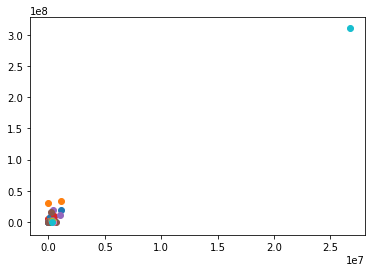

In [37]:
for feature_1, feature_2, _ in finance_features:
    plt.scatter(feature_1, feature_2)
plt.show()

Cluster here:

- create predictions of the cluster labels for the data and store them to a list called **predm**

- deploy k-means clustering on the financial_features data, with 2 clusters specified as a parameter

- store your cluster predictions to a list called pred, so that the **Draw()** at the bottom of the script works properly

The input features we want to use can be any key in the person-level dictionary (salary, director_fees, etc)

- **targetFeatureSplit()** assumes that the label is the _first_ item in feature_list - very important that poi is listed first!

In [ ]:
poi  = "poi" #é um vetor Numpy
feature_1 = "salary"
feature_2 = "exercised_stock_options"
feature_3 = "total_payments"

Duas feições:

In [46]:
features_list = [poi, feature_1, feature_2]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )

Três feições

In [ ]:
features_list = [poi, feature_1, feature_2, feature_3]
data = featureFormat(data_dict, features_list) #é uma matriz NumPy
poi, finance_features = targetFeatureSplit(data) #são tuplas de 3 elementos (feição1, feição2, feição3)

---

Código funcionando, versão 1:

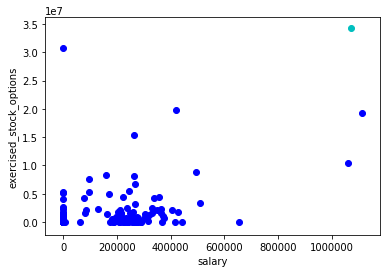

In [54]:
from sklearn.cluster import KMeans

features_list = ["poi", feature_1, feature_2,feature_3]
data2 = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit(data2)

clf = KMeans(n_clusters=2)
pred = clf.fit_predict( finance_features)

Draw(pred, finance_features, poi, name="clusters_before_scaling.pdf", f1_name=feature_1, f2_name=feature_2)

In [55]:
from sklearn.cluster import KMeans

features_list = ["poi", feature_1, feature_2, feature_3]
data2 = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit(data2)

kmeans_model = KMeans(n_clusters = 2).fit(finance_features)
pred = kmeans_model.labels_

---

Se quiser reescalonar (opcional - e usado **depois**):

In [56]:
from sklearn.preprocessing import MinMaxScaler
scl = MinMaxScaler()

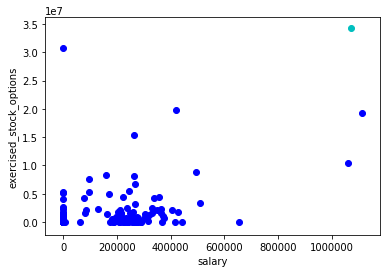

In [57]:
Draw(pred, finance_features, poi, name="clusters_before_scaling.pdf", f1_name=feature_1, f2_name=feature_2)

---

In [48]:
finance_features = scl.fit_transform(finance_features)
import numpy as np
features_test = np.array([[200000., 1000000.]])
print scl.transform(features_test)

[[0.00748945 0.00320755]]


Rename the "name" parameter when you change the number of features so that the figure gets saved to a different file

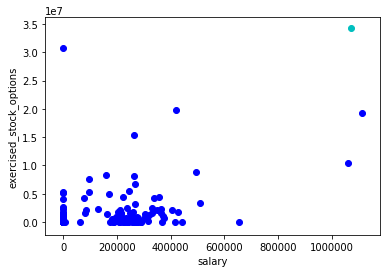

In [58]:
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters2.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print "no predictions object named pred found, no clusters to plot"

Finding max and min exercised_stock_options

In [63]:
maximum = data[:,2].max()

Finding nonzero min

In [64]:
minimum = (data[:,2][np.nonzero(data[:,2])]).min()

print ("Maximum Exercised Stock Option :  $ %0.0F " % maximum )
print ("Minimum Exercised Stock Option :  $ %0.0F " % minimum )

Maximum Exercised Stock Option :  $ 311764000 
Minimum Exercised Stock Option :  $ 3285 


In [65]:
minimum = (data[:,1][np.nonzero(data[:,1])]).min()
maximum = data[:,1].max()

print ("Salário Máximo :  $ %0.0F " % maximum )
print ("Salário Mínimo :  $ %0.0F " % minimum )

Salário Máximo :  $ 26704229 
Salário Mínimo :  $ 477 


In [59]:
salMin = 10000000
salMax = 0
for k in data_dict:
    sal = data_dict[k]["salary"]
    if sal != 'NaN':
        if sal < salMin:
            salMin = sal
        if sal > salMax:
            salMax = sal

print "min:", salMin
print "max:", salMax 

min: 477
max: 1111258


---

Usado a função de escalonamento **.MinMaxScaler()**

*observe que a hora que eu estiver processando centenas, ou milhares de e-mails, existe muita diferença salarial nas companhias. Salários normalmente possuem a casa de centenas, ou talvez poucos milhares de dólares. Agora para os POIs este valor costuma ser 10.000 vezes mais alto! Então escalonar se tonra **essencial** para o meu modelo rodar!*

---

A python dictionary can’t be read directly into an sklearn **classification** or **regression** algorithm

- instead, it needs a numpy array or a list of lists

 - each element of the list (itself a list) is a data point, and
 
 - the elements of the smaller list are the features of that point

We’ve written some helper functions in tools/feature_format.py that can

- take a list of feature names and the data dictionary

- return a numpy array

 - **featureFormat()**

 - **targetFeatureSplit()**

In the case when a feature does not have a value for a particular person

 - this function will also **replace** the feature value with 0 (zero)